# PREDICTION USING UNSUPERVISED ML

"Unsupervised learning, also known as unsupervised machine learning, uses machine learning algorithms to analyze and cluster unlabeled datasets. These algorithms discover hidden patterns or data groupings without the need for human intervention."

In [1]:
#importing libraies

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [6]:
from sklearn import datasets

In [7]:
import seaborn as sns

# STEP-1 READING THE DATA SET

In [8]:
# loading the datset

In [9]:
data = pd.read_csv("C:/Users/sriva/Desktop/The Sparks Foundation/Task2/Iris.csv")

In [10]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [11]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
print(data.tail())

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  


In [13]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Now let's check for unique classes in the dataset

In [14]:
print(data.Species.nunique())

3


In [15]:
print(data.Species.value_counts())

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64


# STEP-2 DATA VISUALIZATION

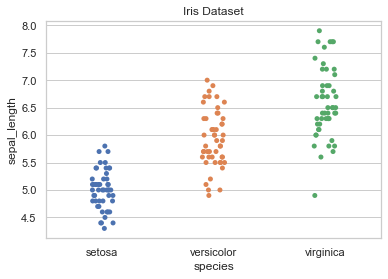

In [16]:
sns.set(style = 'whitegrid')
iris = sns.load_dataset('iris');
ax = sns.stripplot(x='species',y='sepal_length',data = iris);
plt.title('Iris Dataset')
plt.show()

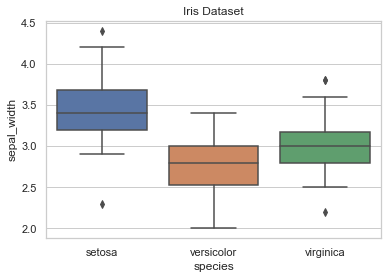

In [17]:
sns.boxplot(x='species',y='sepal_width',data = iris);
plt.title('Iris Dataset')
plt.show()

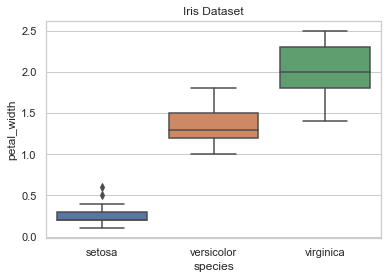

In [18]:
sns.boxplot(x='species',y='petal_width',data = iris);
plt.title('Iris Dataset')
plt.show()

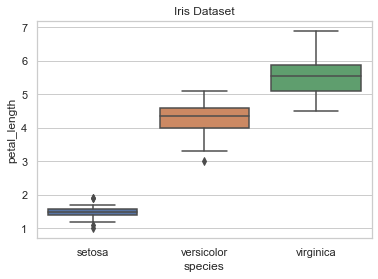

In [19]:
sns.boxplot(x='species',y='petal_length',data = iris);
plt.title('Iris Dataset')
plt.show()

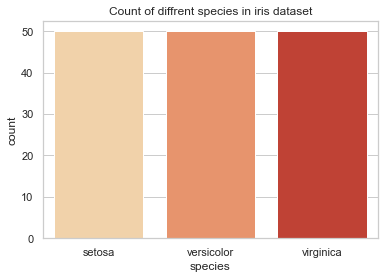

In [20]:
sns.countplot(x='species',data = iris,palette="OrRd")
plt.title("Count of diffrent species in iris dataset")
plt.show()

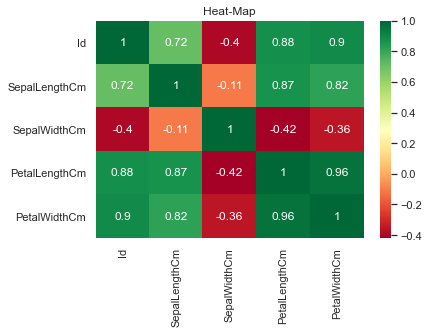

In [21]:
#heat map
sns.heatmap(data.corr(), annot=True,cmap='RdYlGn')
plt.title("Heat-Map")
plt.show()

# Step-3 Finding the optimum number of cluster using k-means clustering

In [22]:
x = data.iloc[:,[0,1,2,3]].values

In [23]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init = 'k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    print('k:',i,"wcss:",kmeans.inertia_)

k: 1 wcss: 281831.54466666654
k: 2 wcss: 70581.3808
k: 3 wcss: 31320.711199999994
k: 4 wcss: 17762.657226173542
k: 5 wcss: 11423.238080088988
k: 6 wcss: 7909.5306730769225
k: 7 wcss: 5881.448116883118
k: 8 wcss: 4562.780079365082
k: 9 wcss: 3579.7205612745106
k: 10 wcss: 2968.4914326653743


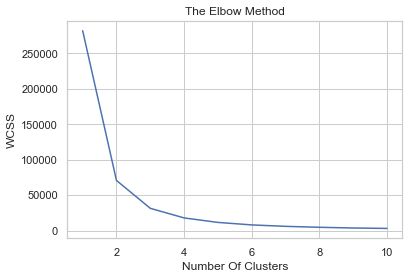

In [24]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number Of Clusters')
plt.ylabel('WCSS')
plt.show()

# STEP-4 INITIALIZING K-MEANS WITH OPTIMUM NUMBER OF CLUSTERS

In [25]:
kmeans = KMeans(n_clusters = i,init = 'k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans = kmeans.fit_predict(x)

# STEP - 5 PREDICTING VALUES

In [26]:
y_kmeans

array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

# STEP-6 VISUALIZING THE CLUSTERS

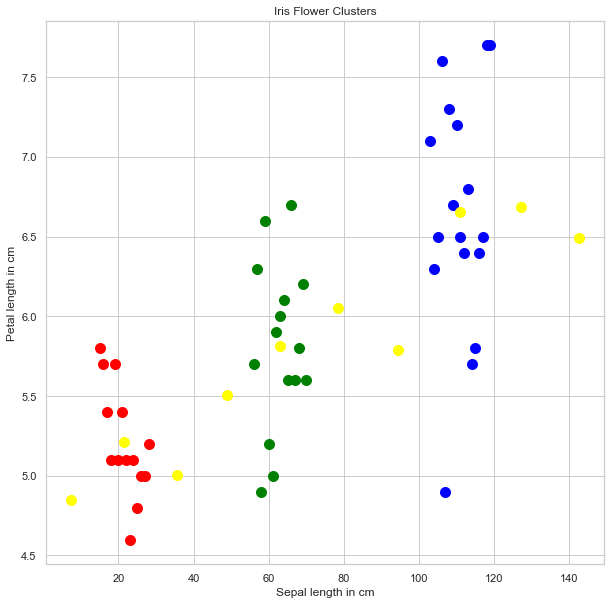

In [27]:
plt.figure(figsize=(10,10))
plt.scatter(x[y_kmeans == 0,0],x[y_kmeans == 0,1],s=100,c = 'red',label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1,0],x[y_kmeans == 1,1],s=100,c = 'blue',label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2,0],x[y_kmeans == 2,1],s=100,c = 'green',label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c = 'yellow',label = 'Centroids')
plt.title('Iris Flower Clusters')
plt.xlabel('Sepal length in cm')
plt.ylabel('Petal length in cm')
plt.show()